# Exercício 4
## Arthur Magalhães - 12629595

## Atividade 1

Estime a integral I=$\int_0^1 x^3 dx$
 via MC usando n=10,100,1000 e 10000 pontos. Para estudar o erro da média de estimativas deste tipo, faça N=10000
 simulações para cada n
 e determine a variância nos valores simulados de I
. Faça um gráfico log-log dessa variância versus n
 e verifique se é a variância é proporcional a 1/n
.

### Estimativa da Integral

Primeiramente foi feita a estimativa da integral pelo método de Monte Carlo. Este método consiste em chegar ao resultado da integral por meio de uma análise estatística da probabilidade de pontos aleatórios cairem dentro ou fora da nossa área de interesse.

Neste caso, para cada um dos conjuntos de pontos utilizados (n = 10, 100, 1000, 10000), eu realizei o seguinte procedimento: defini um par (x,y) aleatório de posição - entre 0 e 1 -  para cada ponto, e em seguida defini a distância de um poto até o centro, seguindo a linha da função, como sendo d = x^3, correspondendo a função analisada; Por fim  defini uma variável para me dizer a quantidade de pontos que cairam na posição na curva da função ou abaixo dela, de forma que a razão entre esta variável e o número total de pontos analisados fornece a frequência de pontos na área abaixo do gráfico, ou seja, o valor aproximado da integral.

O valor teórico e os valores simulados encontrados foram:


- **Valor teórico** $\Rightarrow 0.25$ 
- **n = 10**  $\Rightarrow 0.3$
- **n = 100**  $\Rightarrow 0.19$
- **n = 1000**  $\Rightarrow 0.232$
- **n = 10000**  $\Rightarrow 0.2528$

In [8]:
set.seed(12629595)

n1 = 10
n2 = 100
n3 = 1000
n4 = 10000

x1 = runif(n1)
y1 = runif(n1)
x2 = runif(n2)
y2 = runif(n2)
x3 = runif(n3)
y3 = runif(n3)
x4 = runif(n4)
y4 = runif(n4)

d1=x1^3
d2=x2^3
d3=x3^3
d4=x4^3

nac1=length(which(y1<=d1))
nac2=length(which(y2<=d2))
nac3=length(which(y3<=d3))
nac4=length(which(y4<=d4))

v1 = nac1/n1
v2 = nac2/n2
v3 = nac3/n3
v4 = nac4/n4


v1
v2
v3
v4

[1] 0.3

[1] 0.19

[1] 0.232

[1] 0.2528

### Simulação

Nesta etapa foi realizado, para cada n pontos definidos anteriormente, uma simulação rodando 10000 vezes cada um,  e depois encontrando a variância dos resultados. Para isso, foi definida uma função que pede como entrada apenas o número n de pontos utilizados anteriormente.  A função então mantém o mesmo procedimento explicado anteriormente, com a diferença de que é gerado uma lista vazia de tamanho 10000, em que cada vez que a simulação roda o valor encontrado para a integral é adicionado a lista. Por fim a função retorna a variância de todos os membros da lista.

Após encontrada todas as variâncias, foi feito um gráfico do tipo log-log, no eixo x com os números n adotado, e no eixo y com as variâncias. Foi possível ver claramente que o gráfico segue um comportamento linear decaindo com 1/N. Para finalizar, foi feito um ajuste linear dos pontos, resultando na figura abaixo.

(Intercept) 
   -1.68515

lns 
-0.9967175

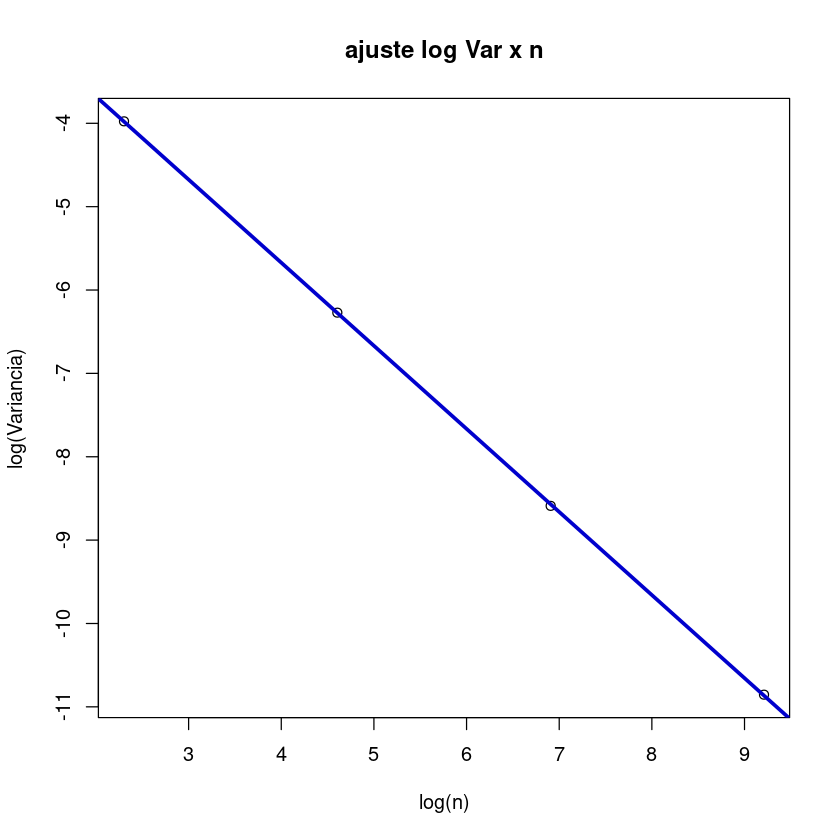

In [6]:
fv = function(n){
  nsim = 10000
  l = rep(0,nsim)
  for (i in 1:nsim){

  x = runif(n)
  y = runif(n)

  d = x^3
  nac = 0  #tem que zerar em todo loop para nao aumentar
  
  nac = length(which(y<=d))

  l[i] = nac/n
  } 
  return(var(l))
}


#Agora vamos definir o eixos para fazer o grafico var() vs n

vrc = c(fv(n1),fv(n2), fv(n3), fv(n4))
ns = c(n1,n2,n3,n4)

lvrc = log(vrc)
lns = log(ns)

aj = lm(lvrc~lns)
aj$coefficients[1]
aj$coefficients[2]

plot(lns,lvrc, main = 'ajuste log Var x n', ylab = "log(Variancia)" , xlab = "log(n)")
abline(aj$coefficients[1],aj$coefficients[2],lwd=3,col='blue3')

## Atividade 2 


Simule por MCMC a pdf $P(x)\propto xe^{-x}(x \geq 0)$. Faça simulações com 10000 iterações. Use uma função de aceitação gaussiana com σ=
 0.1, 1 e 10. Faça figuras relevantes e comente como a escolha de σ
 afeta o algoritmo. Comente sobre o ‘burn-in’ nesses casos.

### Simulação

Primeiramente foi definida a função P(x), tal qual dada na questão, com a propriedade de aceitar apenas valores de x >=0. Depois disso, foi escrito uma função para fazer o cálculo do método MCMC, de forma que necessita de 3 variáveis: o valor de x inicial para começar a cadeia, o número de vezes que a simulaçao será rodada e o valor sigma do desvio padrão que usaremos.

A simulação foi rodada para os 3 valores de sigma apresentados na questão retornando uma cadeia de todos os valores encontrados para cada vez que a função era rodada.

In [77]:
set.seed(12629595)
# Definindo P(x)


p = function(x){
    A = 0
    if (x>=0){
        A= x*exp(-x)
    }
    return(A)}

mcmc = function(xini, niter, sigma){
#definir a funcao a ser utilizada
    funcao_proposta = function(x){rnorm(1, mean = x, sd = sigma)}
# defino o vetor que conterá os valores da cadeia  
    cadeia = array(niter+1)
# inicialização da cadeia    
    cadeia[1] = xini
# loop para gerar a cadeia    
    for (i in 1:niter){
# obtenho uma proposta      
        proposta = funcao_proposta(cadeia[i])
# razão entre o valor proposto nesta iteração e o valor anterior da cadeia        
        probab = p(proposta)/p(cadeia[i])
# gero um número aleatório uniformemente distribuído entre 0 e 1 
      runif1=runif(1)
# testo se a proposta é aceita ou não     
        if (probab > runif1) {
# aceita          
            cadeia[i+1] = proposta}
        else{
# não aceita: usa o valor anterior da cadeia         
            cadeia[i+1] = cadeia[i]}
    }
# retorna a cadeia    
    return(cadeia)
}

### Análise dos dados e Burn-in

Para análise dos dados, primeiramente separei nos 3 casos diferentes de desvio padrão, e para cada um dos casos apliquei o mesmo procedimento.

Primeiramente defini os conjuntos de dados chamando a função escrita anteriormente para encontrar a cadeia do método MCMC. Após isso, eu plotei os dados em duas visualizações diferentes: a primeira sendo um gráfico de linha, em que se é possível ver a distribuição saindo do valor incial e convergindo para a média, e a segunda maneira como um histograma, em que podemos ter uma análise visual da distribuição geral.

Em cada um dos gráfico eu optei por adicionar uma linha mostrando a média, para melhor visualização da convergência, no entanto, para um cálculo mais exato do valor foi necessário retirar oque chamamos de "burn-in", que corresponde a um númeor de passos iniciais da distribuição antes de chegar na zona de convergência. De maneiera conservadora, defini com burn-in como os 2000 primeiros passos, calculando a taxa de aceitação e a média da distribuição para cada um dos casos.

Os resultados gráficos podem ser encontrados a seguir:

[1] "Taxa de aceitação:  0.970003749531309"

[1] "Média:  1.98969790759713"

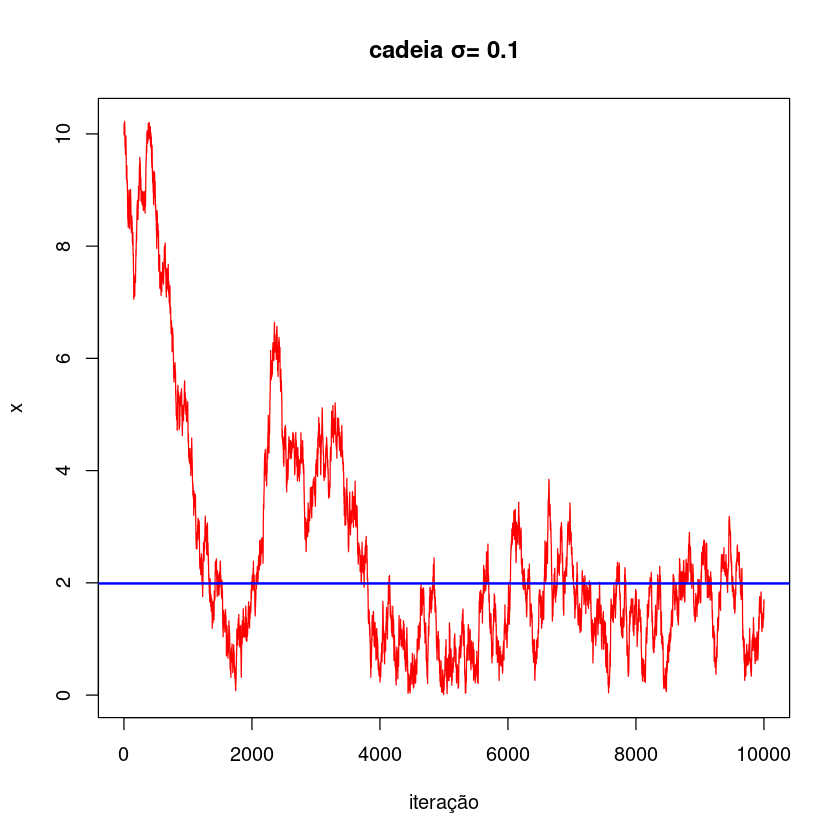

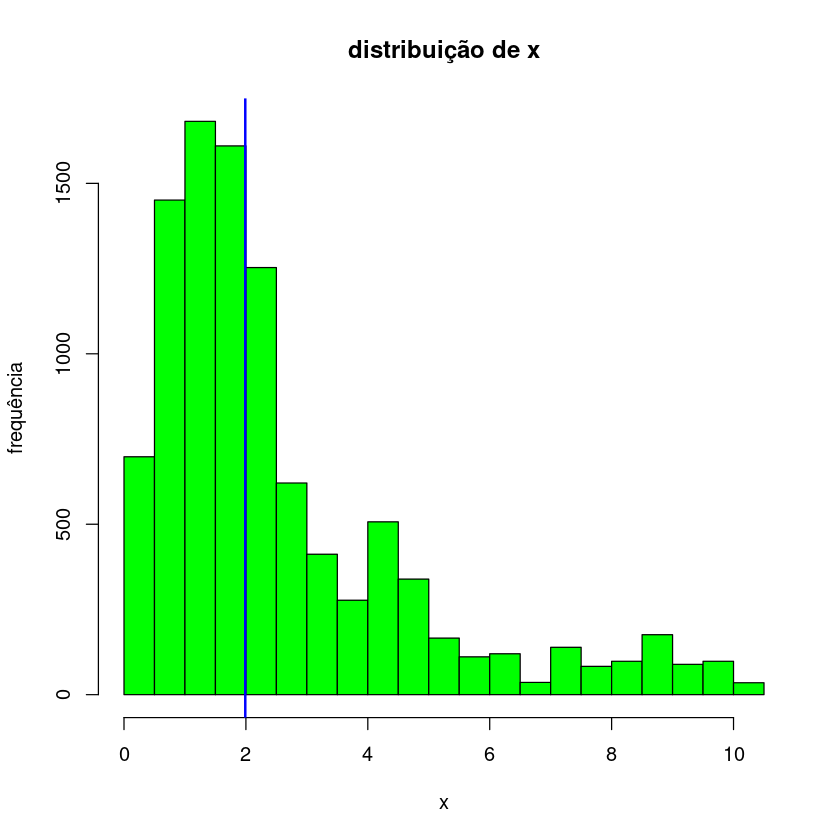

In [97]:
#par(mfrow = c(1,2))

nsim = 10000

y01 = mcmc(10,nsim,0.1)
x01 = seq(1,nsim + 1 , 1)

plot(x01,y01,type='l',col='red',ylab='x',xlab='iteração',main='cadeia σ= 0.1')

burnin = 2000
aceitacao01 = 1-mean(duplicated(y01[-(1:burnin)]))
paste("Taxa de aceitação: ", aceitacao01)

my01 = mean(y01[-(1:burnin)])
paste("Média: ", my01)

# adiciona uma reta horizontal no valor esperado
abline(h = my01, col="blue",lwd=2)

hist(y01,col='green',main='distribuição de x',xlab='x',ylab='frequência')

# adiciona uma reta vertical no valor esperado
abline(v = my01, col="blue",lwd=2)

[1] "Taxa de aceitação:  0.739782527184102"

[1] "Média:  2.03589712749224"

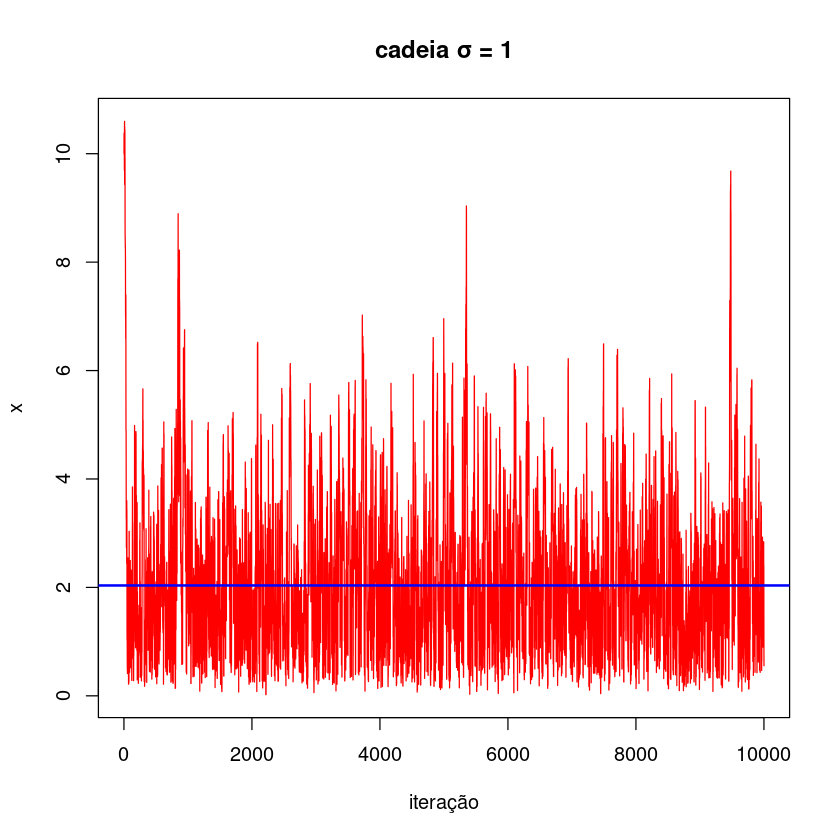

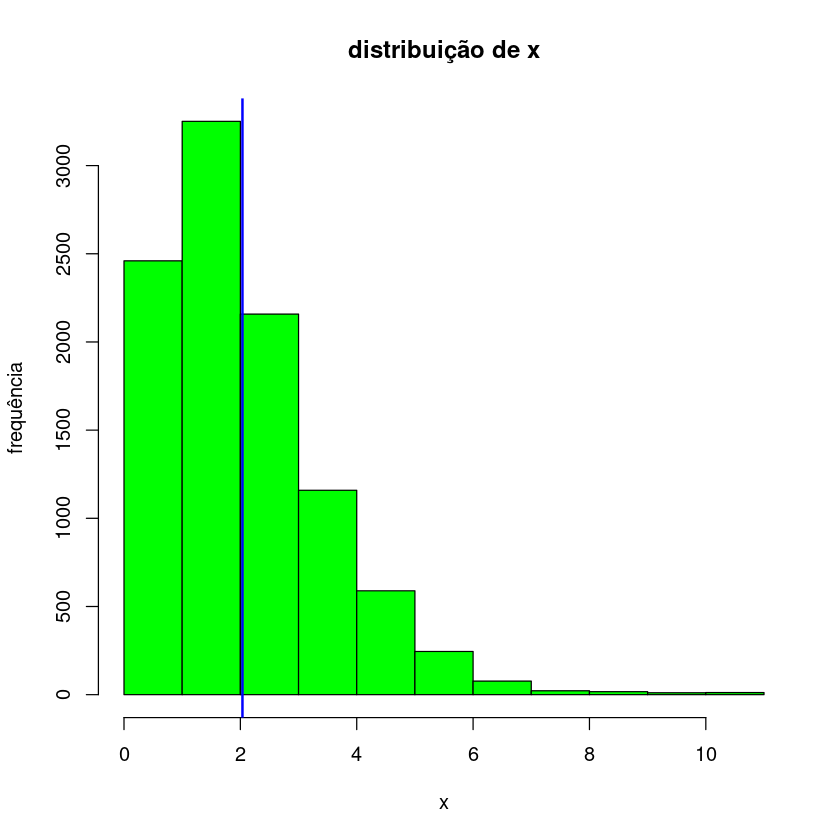

In [96]:
y1 = mcmc(10,nsim,1)
x1 = seq(1,nsim + 1 , 1)

plot(x1,y1,type='l',col='red',ylab='x',xlab='iteração',main='cadeia σ = 1')

burnin = 2000
aceitacao1 = 1-mean(duplicated(y1[-(1:burnin)]))
paste("Taxa de aceitação: ", aceitacao1)

my1 = mean(y1[-(1:burnin)])
paste("Média: ", my1)

# adiciona uma reta horizontal no valor esperado
abline(h = my1, col="blue",lwd=2)

hist(y1,col='green',main='distribuição de x',xlab='x',ylab='frequência')

# adiciona uma reta vertical no valor esperado
abline(v = my1, col="blue",lwd=2)

[1] "Taxa de aceitação:  0.144106986626672"

[1] "Média:  1.9821409231119"

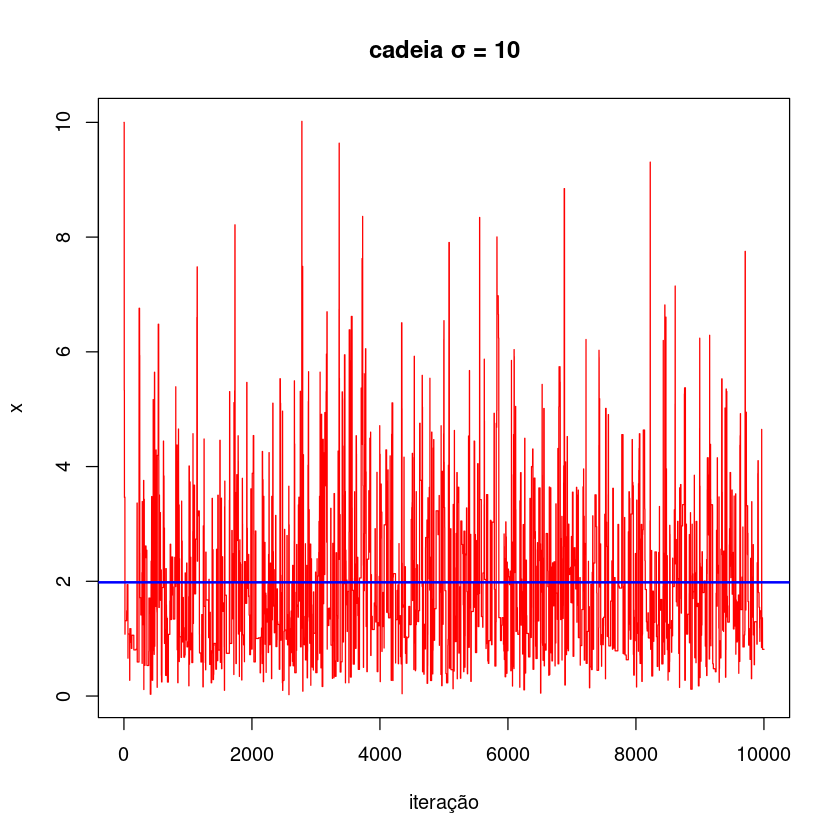

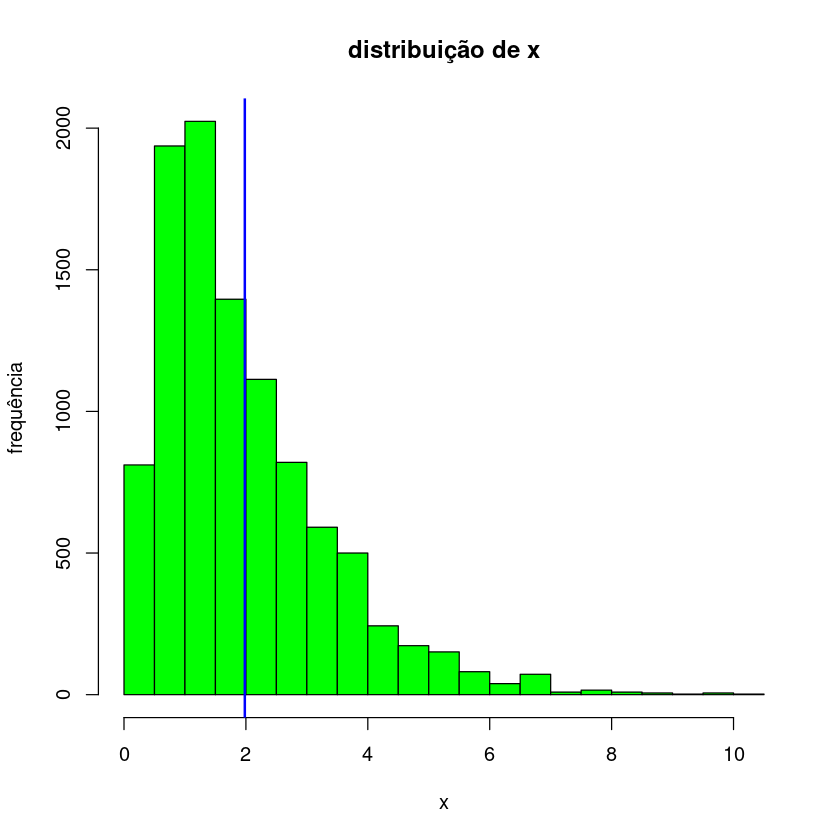

In [95]:
y10 = mcmc(10,nsim,10)
x10 = seq(1,nsim + 1 , 1)

plot(x10,y10,type='l',col='red',ylab='x',xlab='iteração',main='cadeia σ = 10')

burnin = 2000
aceitacao10 = 1-mean(duplicated(y10[-(1:burnin)]))
paste("Taxa de aceitação: ", aceitacao10)

my10 = mean(y10[-(1:burnin)])
paste("Média: ", my10)



# adiciona uma reta horizontal no valor esperado
abline(h = my10, col="blue",lwd=2)

hist(y10,col='green',main='distribuição de x',xlab='x',ylab='frequência')

# adiciona uma reta vertical no valor esperado
abline(v = my10, col="blue",lwd=2)